![front1](jupyter_img/front4.png)

## This Jupyter notebook is available at https://github.com/dkp-quantum/Tutorials

## Further Information

#### * Qiskit: https://qiskit.org

#### * Qiskit GitHub: https://github.com/Qiskit

# Eigenvalue Measurement

### If an eigenvalue of a unitary matrix is +1 or -1, it can be measured by the following circuit:

<br> </br>
<div>
<img src="jupyter_img/eigen_measure.png" width="500"/>
</div>
<br> </br>

## Exercise:

## 1. Design quantum circuits to measure eigenvalues of $Z\otimes Z\otimes I$ on $\frac{\alpha|000\rangle +\beta|111\rangle}{2}$ and $\frac{\alpha|010\rangle +\beta|101\rangle}{2}$.

## 2. Design quantum circuits to measure eigenvalues of $X\otimes X\otimes I$ on $\frac{\alpha|+++\rangle +\beta|---\rangle}{2}$ and $\frac{\alpha|+-+\rangle +\beta|-+-\rangle}{2}$. (Hint: $|+\rangle = H|0\rangle$ and $|-\rangle = H|1\rangle$).

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
import numpy as np

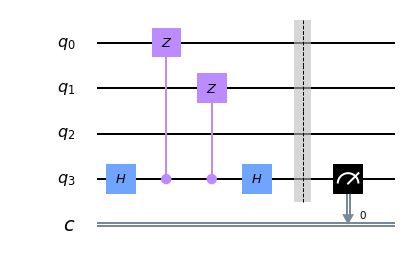

In [2]:
# Exercise 1.
# Create the measurement circuit
ZZI = QuantumCircuit(4,1)
ZZI.h(3)
ZZI.cz(3,0)
ZZI.cz(3,1)
ZZI.h(3)
ZZI.barrier()
ZZI.measure(3,0)
ZZI.draw(output='mpl')

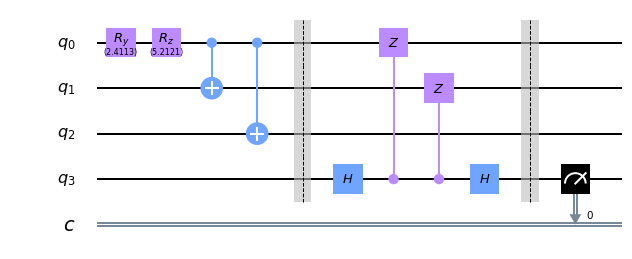

In [3]:
# Create the first test state, i.e. a|000> + b|111>
ztest1 = QuantumCircuit(4)

theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi

ztest1.ry(theta,0)
ztest1.rz(phi,0)

ztest1.cx(0,1)
ztest1.cx(0,2)
ztest1.barrier()

# Now add the measurement circuit
ztest1 = ztest1 + ZZI
ztest1.draw(output='mpl')

In [4]:
# Use Aer's qasm_simulator
backend_q = Aer.get_backend('qasm_simulator')

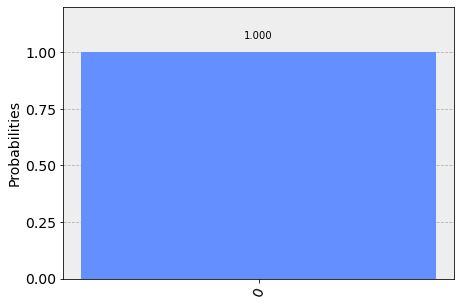

In [5]:
# Execute the circuit on the qasm simulator.
job_ztest1 = execute(ztest1, backend_q, shots=4096)

# Grab the results from the job.
result_ztest1 = job_ztest1.result()
plot_histogram(result_ztest1.get_counts(ztest1))

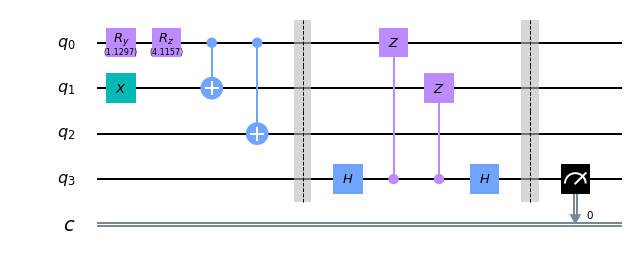

In [6]:
# Create the second test state, i.e. a|010> + b|101>
ztest2 = QuantumCircuit(4)

theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi

ztest2.ry(theta,0)
ztest2.rz(phi,0)

# Flip the second qubit
ztest2.x(1)

ztest2.cx(0,1)
ztest2.cx(0,2)
ztest2.barrier()

# Now add the measurement circuit
ztest2 = ztest2 + ZZI
ztest2.draw(output='mpl')

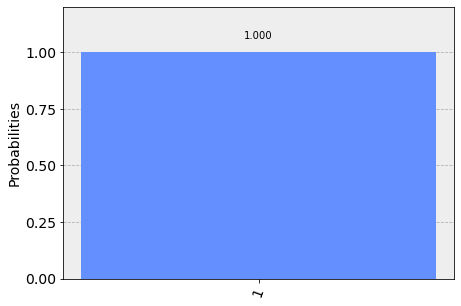

In [7]:
# Execute the circuit on the qasm simulator.
job_ztest2 = execute(ztest2, backend_q, shots=4096)

# Grab the results from the job.
result_ztest2 = job_ztest2.result()
plot_histogram(result_ztest2.get_counts(ztest2))

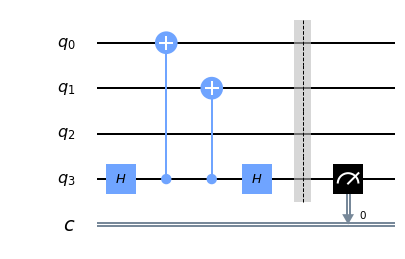

In [8]:
# Exercise 2.
# Create the measurement circuit
XXI = QuantumCircuit(4,1)
XXI.h(3)
XXI.cx(3,0)
XXI.cx(3,1)
XXI.h(3)
XXI.barrier()
XXI.measure(3,0)
XXI.draw(output='mpl')

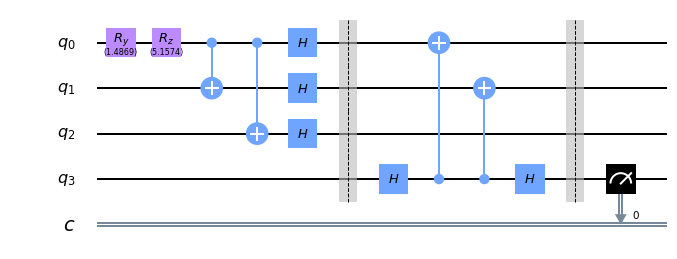

In [9]:
# Create the first test state, i.e. a|+++> + b|--->
xtest1 = QuantumCircuit(4)

theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi

xtest1.ry(theta,0)
xtest1.rz(phi,0)

xtest1.cx(0,1)
xtest1.cx(0,2)

for i in range(3):
    xtest1.h(i)

xtest1.barrier()

# Now add the measurement circuit
xtest1 = xtest1 + XXI
xtest1.draw(output='mpl')

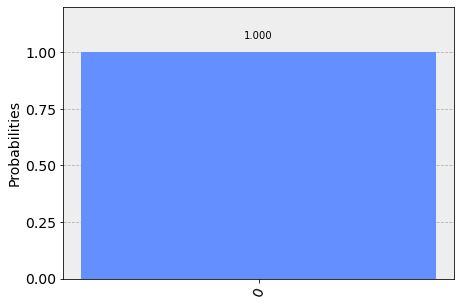

In [10]:
# Execute the circuit on the qasm simulator.
job_xtest1 = execute(xtest1, backend_q, shots=4096)

# Grab the results from the job.
result_xtest1 = job_xtest1.result()
plot_histogram(result_xtest1.get_counts(xtest1))

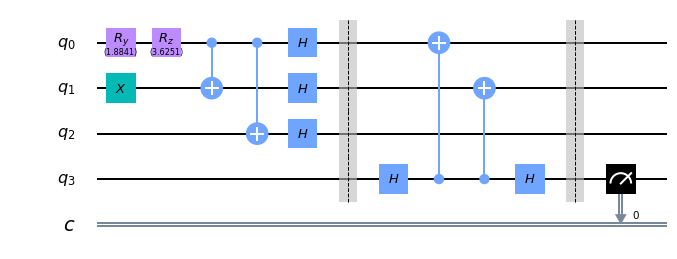

In [11]:
# Create the first test state, i.e. a|+-+> + b|-+->
xtest2 = QuantumCircuit(4)

theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi

xtest2.ry(theta,0)
xtest2.rz(phi,0)

# Flip the second qubit
xtest2.x(1)

xtest2.cx(0,1)
xtest2.cx(0,2)

for i in range(3):
    xtest2.h(i)

xtest2.barrier()

# Now add the measurement circuit
xtest2 = xtest2 + XXI
xtest2.draw(output='mpl')

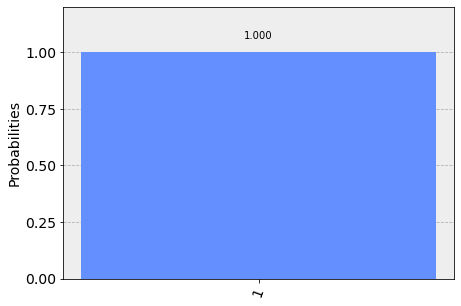

In [12]:
# Execute the circuit on the qasm simulator.
job_xtest2 = execute(xtest2, backend_q, shots=4096)

# Grab the results from the job.
result_xtest2 = job_xtest2.result()
plot_histogram(result_xtest2.get_counts(xtest2))

![qec2_1](jupyter_img/qec2_1.png)

![qec2](jupyter_img/qec2_2.png)

![qec3](jupyter_img/qec2_3.png)

## Let's try QEC without decoding!

In [13]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
import numpy as np

In [14]:
def encoding_x(qc):
    qc.cx(0,1)
    qc.cx(0,2)
    qc.barrier()
    
def measure_error(qc,error):
    if error == 'x':
        qc.h(3)
        qc.h(4)
        qc.cz(3,0)
        qc.cz(3,1)
        qc.cz(4,0)
        qc.cz(4,2)
        qc.h(3)
        qc.h(4)
   
    elif error == 'z':
        qc.h(3)
        qc.h(4)
        qc.cx(3,0)
        qc.cx(3,1)
        qc.cx(4,0)
        qc.cx(4,2)
        qc.h(3)
        qc.h(4)
        
    qc.barrier()
            
# We don't need decoding for QEC,
# but we will use it for checking the answer
def decoding_x(qc):
    qc.cx(0,2)
    qc.cx(0,1)
    qc.barrier()

In [15]:
def random_init(qc,theta,phi,index):
    
    ## Prepare a random single-qubit state
    qc.ry(theta,index)
    qc.rz(phi,index)
    qc.barrier()

def random_init_inv(qc,theta,phi,index):
    
    ## Inverse of the random single-qubit state preparation
    qc.rz(-phi,index)
    qc.ry(-theta,index)
    qc.barrier()

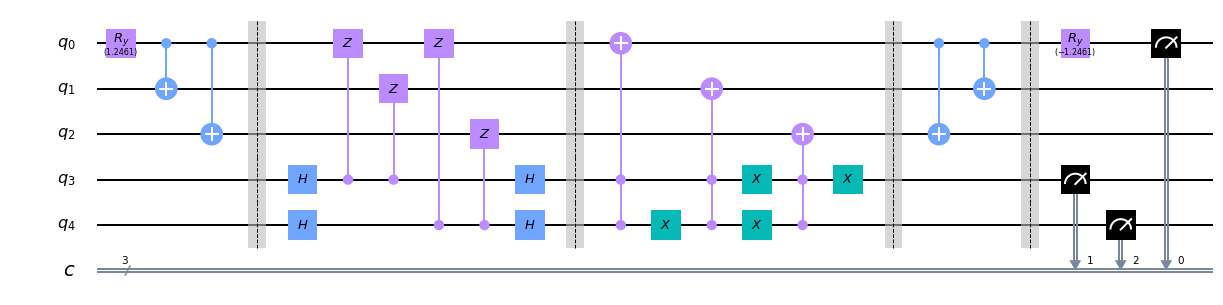

In [16]:
qec2x = QuantumCircuit(5,3)

# Initialize the first qubit in a random state
theta = np.random.random()*np.pi
qec2x.ry(theta,0)

# QEC encoding for correcting a bit-flip error
encoding_x(qec2x)

# Measurement
measure_error(qec2x,'x')

# Correction
# Correct the first qubit
qec2x.ccx(3,4,0)
# Correct the second qubit
qec2x.x(4)
qec2x.ccx(3,4,1)
qec2x.x(4)
# Correct the third qubit
qec2x.x(3)
qec2x.ccx(3,4,2)
qec2x.x(3)
qec2x.barrier()

# QEC decoding for correcting a bit-flip error
decoding_x(qec2x)

# Insert inverse of the random initial state preparation
# to check that the QEC has worked.
qec2x.ry(-theta,0)

qec2x.measure(0,0)
# Let's check the error syndrome
qec2x.measure(3,1)
qec2x.measure(4,2)

qec2x.draw(output='mpl')

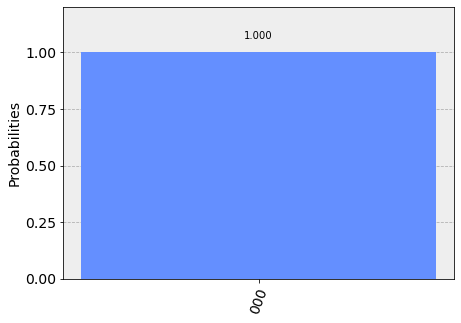

In [17]:
# Execute the circuit on the qasm simulator.
job_qec2x_ref = execute(qec2x, backend_q, shots=4096)

# Grab the results from the job.
result_qec2x_ref = job_qec2x_ref.result()
plot_histogram(result_qec2x_ref.get_counts(qec2x))

## Let's try it on a real quantum device

In [5]:
# IBMQ.disable_account()
provider = IBMQ.enable_account('TOKEN')

In [6]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [20]:
# Retrieve IBM Quantum device information
backend_overview()

ibmq_rome                    ibmq_armonk                  ibmq_essex
---------                    -----------                  ----------
Num. Qubits:  5              Num. Qubits:  1              Num. Qubits:  5
Pending Jobs: 19             Pending Jobs: 1              Pending Jobs: 5
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      73.9           Avg. T1:      180.3          Avg. T1:      100.6
Avg. T2:      89.3           Avg. T2:      223.8          Avg. T2:      122.5



ibmq_burlington              ibmq_london                 ibmq_valencia
---------------              -----------                 -------------
Num. Qubits:  5              Num. Qubits:  5             Num. Qubits:  5
Pending Jobs: 3              Pending Jobs: 0             Pending Jobs: 151
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True           Oper

In [21]:
# Let's also try the same experiment on the 15-qubit device.
job_exp_qec2x = execute(qec2x, backend=provider.get_backend('ibmq_valencia'), shots=8192)
job_monitor(job_exp_qec2x)

Job Status: job has successfully run


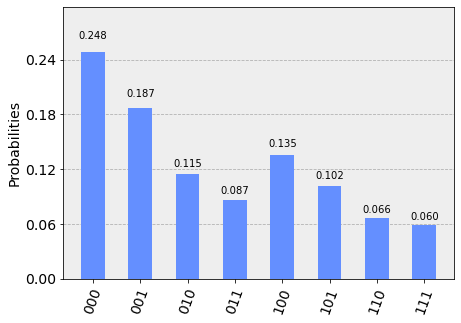

In [22]:
# Grab experimental results
result_exp_qec2x = job_exp_qec2x.result()
plot_histogram(result_exp_qec2x.get_counts(qec2x))

## Let's go back to simulation, and insert some bit-flip error

In [23]:
# Define bit-flip errors with probability p
def bitflip(qc,qubit,p):
    if np.random.binomial(1,p) == 1:
        qc.x(qubit)

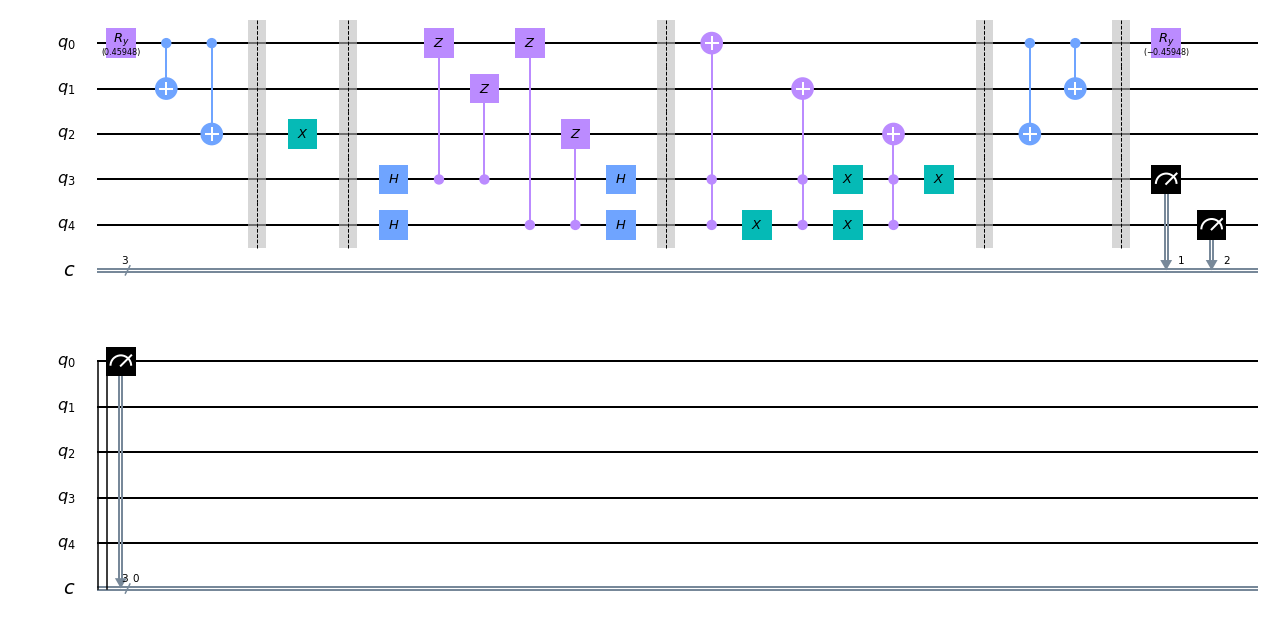

In [24]:
qec2x = QuantumCircuit(5,3)

# Initialize the first qubit in a random state
theta = np.random.random()*np.pi
qec2x.ry(theta,0)

# QEC encoding for correcting a bit-flip error
encoding_x(qec2x)

# Insert error
p=1
# bitflip(qec2x,0,p)
# bitflip(qec2x,1,p)
bitflip(qec2x,2,p)
qec2x.barrier()

# Measurement
measure_error(qec2x,'x')

# Correction
# Correct the first qubit
qec2x.ccx(3,4,0)
# Correct the second qubit
qec2x.x(4)
qec2x.ccx(3,4,1)
qec2x.x(4)
# Correct the third qubit
qec2x.x(3)
qec2x.ccx(3,4,2)
qec2x.x(3)
qec2x.barrier()

# QEC decoding for correcting a bit-flip error
decoding_x(qec2x)

# Insert inverse of the random initial state preparation
# to check that the QEC has worked.
qec2x.ry(-theta,0)

qec2x.measure(0,0)
# Let's check the error syndrome
qec2x.measure(3,1)
qec2x.measure(4,2)

qec2x.draw(output='mpl')

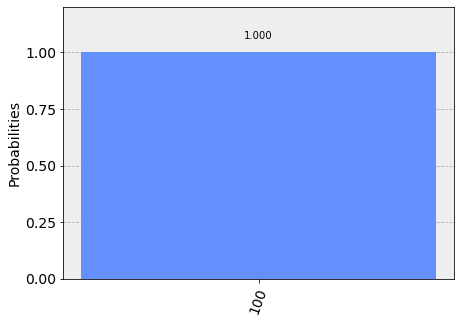

In [25]:
# Execute the circuit on the qasm simulator.
job_qec2x = execute(qec2x, backend_q, shots=4096)

# Grab the results from the job.
result_qec2x = job_qec2x.result()
plot_histogram(result_qec2x.get_counts(qec2x))

## Limitations of Current Quantum Devices

- Noisy qubits: Total runtime must be much less than T1 and T2 (in the orde of 10-100 $\mu$s)
- Noisy gates

__$\rightarrow$ Circuit depth must be as shallow as possible__

__Let's look at the 15 qubit IBM quantum device:__
<div>
<img src="jupyter_img/ibmq_mel.png" width="600"/>
</div>

- Arbitrary gates must be decomposed into the native (basis) gate set

- Limited qubit connectivity for entangling gates.
    - In general, `swap` gates (~ 3 `cnot`) are used to complete the connectivity
<div>
<img src="jupyter_img/swap_to_cnot.png" width="400"/>
</div>

__$\rightarrow$ Increases the circuit depth__

### Must rewrite circuits (transpile) for device topology, and to minimize depth 

### Transpiler is qiskit's circuit-rewriting framework

### Note: compiler would correspond to a larger translation from circuits to the level of machine pulses.

In [3]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager, Layout

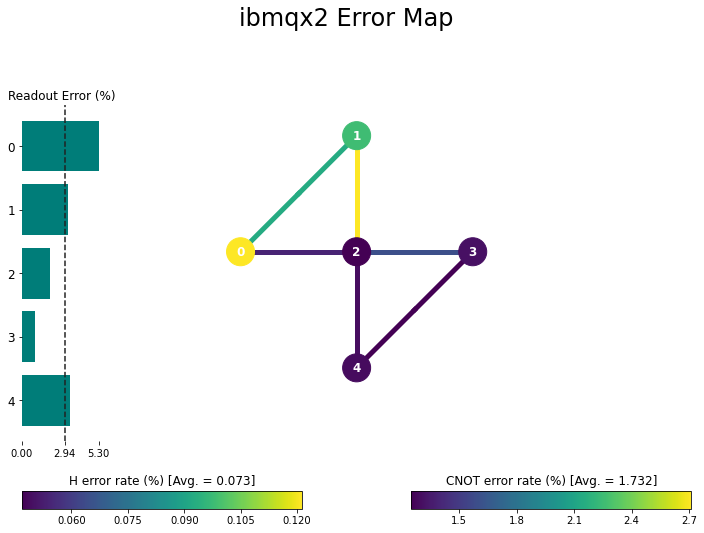

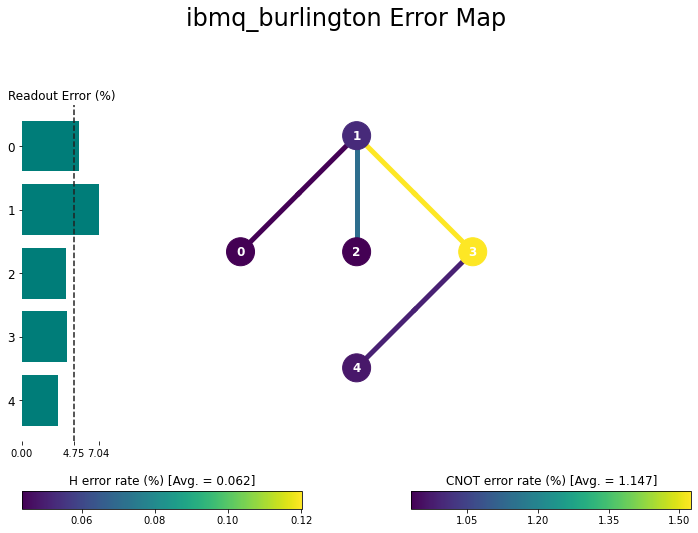

In [27]:
display(plot_error_map(provider.get_backend('ibmqx2')))
display(plot_error_map(provider.get_backend('ibmq_burlington')))

Original circuit


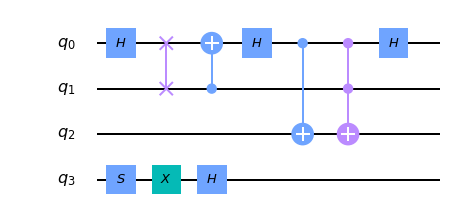

Transpiled circuit for ibmqx2


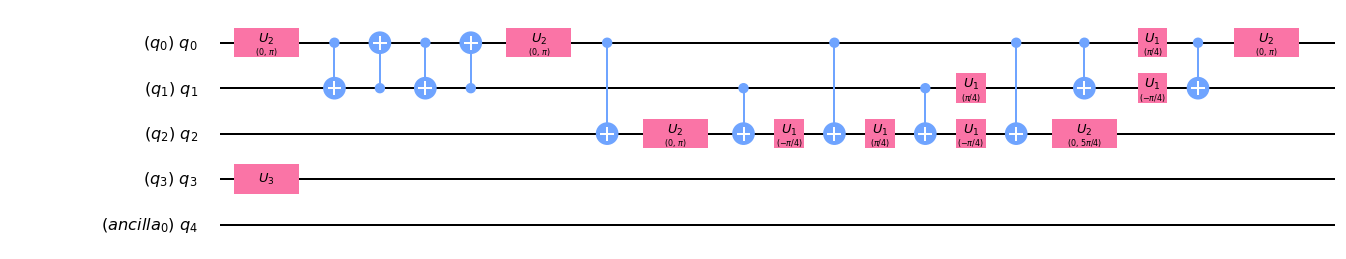

Transpiled circuit for ibmqx_Burlington


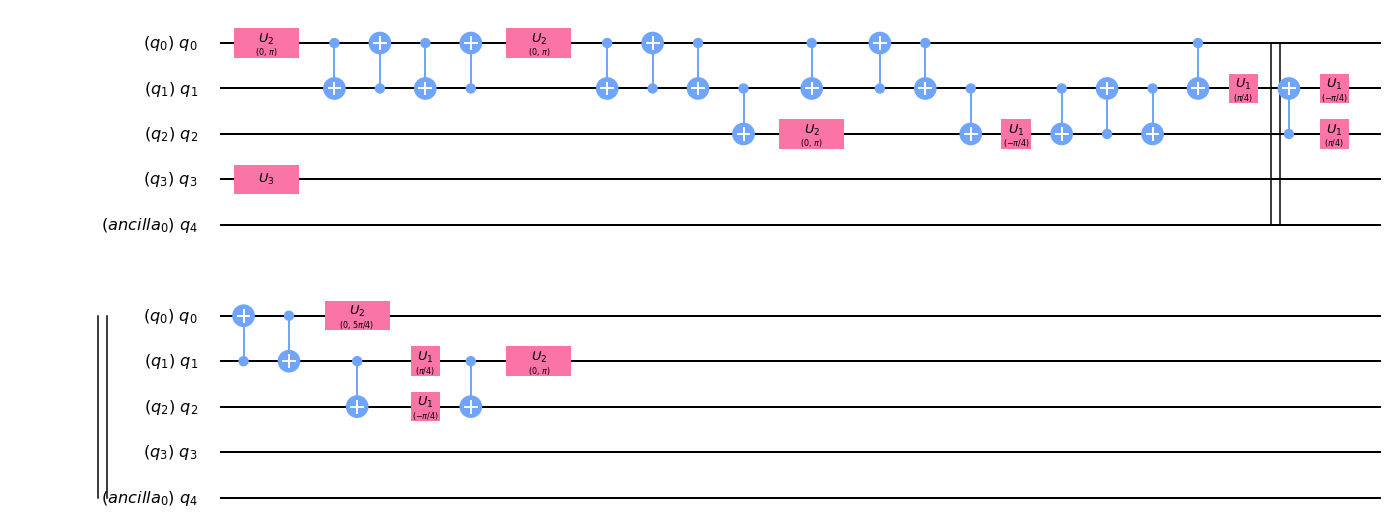

In [7]:
# Create a dummy circuit for default transpiler demonstration
qc = QuantumCircuit(4)
qc.h(0)
qc.swap(0,1)
qc.cx(1,0)
qc.s(3)
qc.x(3)
qc.h(3)
qc.h(0)
qc.cx(0,2)
qc.ccx(0,1,2)
qc.h(0)
print('Original circuit')
display(qc.draw(output='mpl'))

# Transpile the circuit to run on ibmqx2
qt_qx2 = transpile(qc,provider.get_backend('ibmqx2'))
print('Transpiled circuit for ibmqx2')
display(qt_qx2.draw(output='mpl'))

# Transpile the circuit to run on ibmq_burlington
qt_bu = transpile(qc,provider.get_backend('ibmq_burlington'))
print('Transpiled circuit for ibmqx_Burlington')
display(qt_bu.draw(output='mpl'))

In [29]:
# Print out some circuit properties
# Total nunmber of operations
print("Number of operations for ibmqx2 = %s" % qt_qx2.size())
print("Number of operations for ibmq_burlington = %s \n" % qt_bu.size())

# Circuit depth
print("Circuit depth for ibmqx2 = %s" % qt_qx2.depth())
print("Circuit depth for ibmq_burlington = %s \n" % qt_bu.depth())

# Number of qubits
print("Number of qubits for ibmqx2 = %s" % qt_qx2.width())
print("Number of qubits for ibmq_burlington = %s \n" % qt_bu.width())

# Breakdown of operations by type
print("Operations for ibmqx2: %s" % qt_qx2.count_ops())
print("Operations for ibmq_burlington: %s \n" % qt_bu.count_ops())


# Number of unentangled subcircuits in this circuit.
# In principle, each subcircuit can be executed on a different quantum device.
print("Number of unentangled subcircuits for ibmqx2 = %s" % qt_qx2.num_tensor_factors())
print("Number of unentangled subcircuits for ibmq_burlington = %s" % qt_bu.num_tensor_factors())

Number of operations for ibmqx2 = 23
Number of operations for ibmq_burlington = 32 

Circuit depth for ibmqx2 = 19
Circuit depth for ibmq_burlington = 28 

Number of qubits for ibmqx2 = 5
Number of qubits for ibmq_burlington = 5 

Operations for ibmqx2: OrderedDict([('cx', 11), ('u1', 6), ('u2', 5), ('u3', 1)])
Operations for ibmq_burlington: OrderedDict([('cx', 20), ('u1', 6), ('u2', 5), ('u3', 1)]) 

Number of unentangled subcircuits for ibmqx2 = 3
Number of unentangled subcircuits for ibmq_burlington = 3


## Pick physical qubits

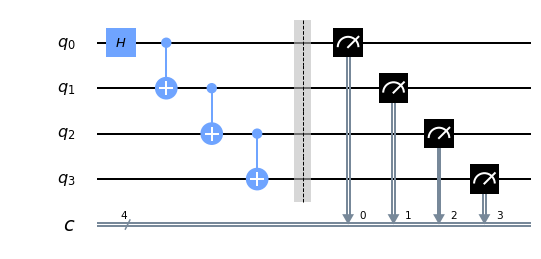

In [30]:
qr = QuantumRegister(4,'q')
cr = ClassicalRegister(4,'c')
qc_test = QuantumCircuit(qr,cr)

qc_test.h(0)
for i in range(3):
    qc_test.cx(i,i+1)

qc_test.barrier()
qc_test.measure(qr,cr)

qc_test.draw(output='mpl')

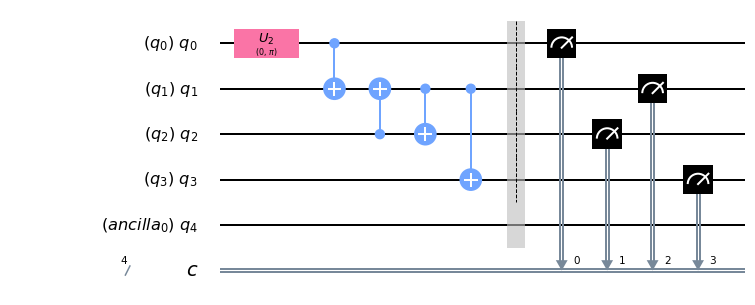

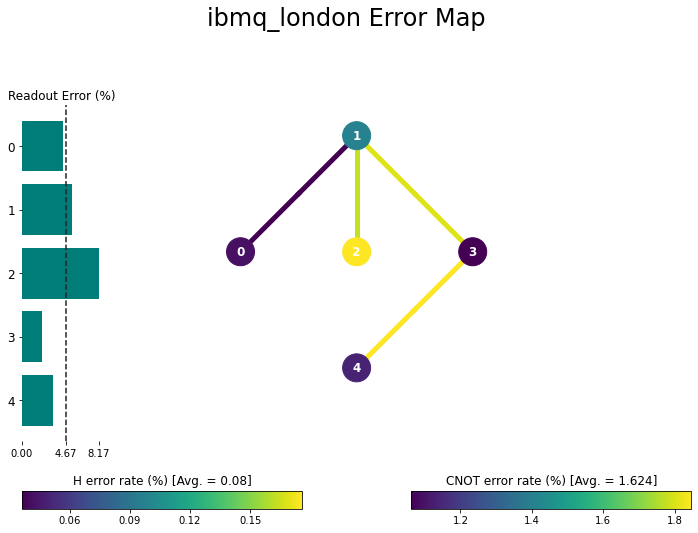

Number of operations = 9
Circuit depth = 6


In [31]:
qc_t = transpile(qc_test, backend = provider.get_backend('ibmq_london'))
# Display transpiled circuit
display(qc_t.draw(output='mpl'))
# Display the qubit layout
display(plot_error_map(provider.get_backend('ibmq_london')))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_t.size())
# Circuit depth
print("Circuit depth = %s" % qc_t.depth())

In [33]:
# Execute the circuit on the qasm simulator.
job_test = execute(qc_test, provider.get_backend('ibmq_london'), shots=8192)
job_monitor(job_test)

Job Status: job has successfully run


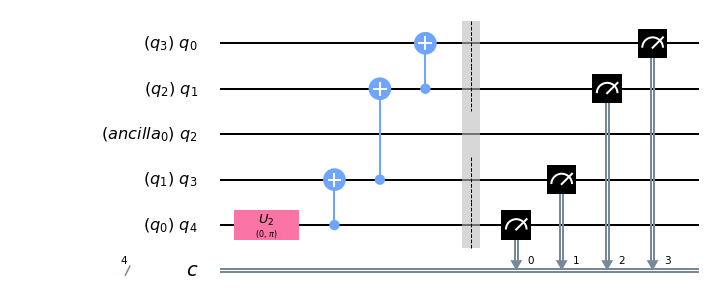

Number of operations = 8
Circuit depth = 5


In [34]:
# Customize the layout
layout = Layout({qr[0]: 4, qr[1]: 3, qr[2]: 1, qr[3]:0})
# Map it onto 5 qubit backend ibmqx2
qc_test_new = transpile(qc_test, backend = provider.get_backend('ibmq_london'), initial_layout=layout, basis_gates=['u1','u2','u3','cx'])
display(qc_test_new.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_test_new.size())
# Circuit depth
print("Circuit depth = %s" % qc_test_new.depth())

In [35]:
# Execute the circuit on the qasm simulator.
job_test_new = execute(qc_test_new, provider.get_backend('ibmq_london'), shots=8192)
job_monitor(job_test_new)

Job Status: job has successfully run


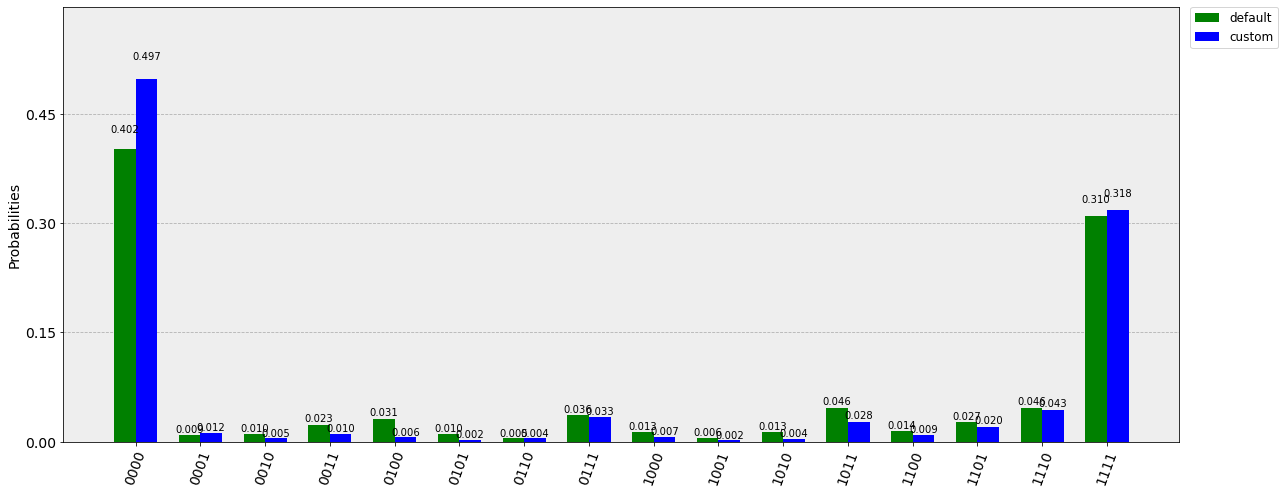

In [36]:
# Now, compare the two
result_test = job_test.result()
result_test_new = job_test_new.result()

# Plot both experimental and ideal results
plot_histogram([result_test.get_counts(qc_test),result_test_new.get_counts(qc_test_new)],
               color=['green','blue'],legend=['default','custom'],figsize = [20,8])

## Minimize `Swap`

### Strategy: Find the best circuit stochastically

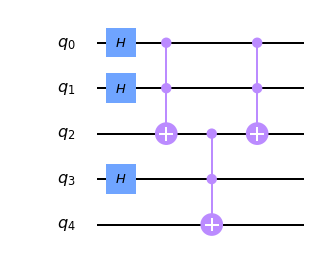

Number of operations = 6 

Operation counts = OrderedDict([('h', 3), ('ccx', 3)]) 

Circuit depth = 4


In [37]:
# Apply 4-qubit controlled x gate
qr = QuantumRegister(5,'q')
qc = QuantumCircuit(qr)

qc.h(0)
qc.h(1)
qc.h(3)

qc.ccx(0,1,2)
qc.ccx(2,3,4)
qc.ccx(0,1,2)
    
display(qc.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s \n" % qc.size())
# Count different types of operations
print("Operation counts = %s \n" % qc.count_ops())
# Circuit depth
print("Circuit depth = %s" % qc.depth())

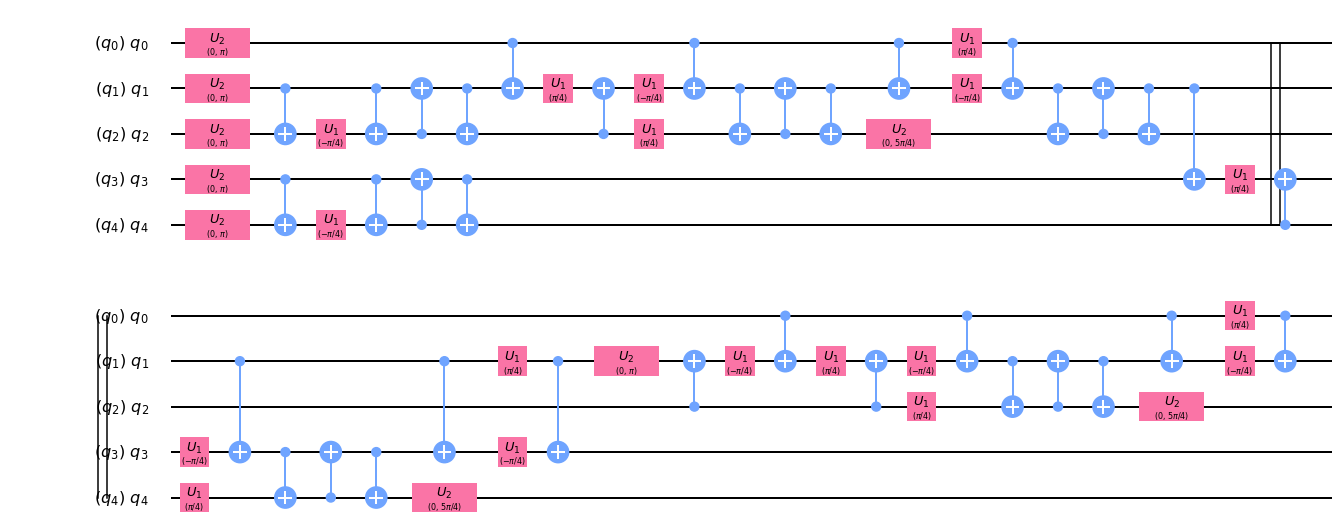

Number of operations = 63
Circuit depth = 45


In [38]:
qc_t = transpile(qc, provider.get_backend('ibmq_valencia'))
display(qc_t.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_t.size())
# Circuit depth
print("Circuit depth = %s" % qc_t.depth())

In [40]:
# Transpile many times (20 times in this example) and pick the best one
trial = 20
# Use ibmq_valencia for example
backend_exp = provider.get_backend('ibmq_valencia')

tcircs0 = transpile([qc]*trial, backend_exp, optimization_level=0)
tcircs1 = transpile([qc]*trial, backend_exp, optimization_level=1)
tcircs2 = transpile([qc]*trial, backend_exp, optimization_level=2)
tcircs3 = transpile([qc]*trial, backend_exp, optimization_level=3)

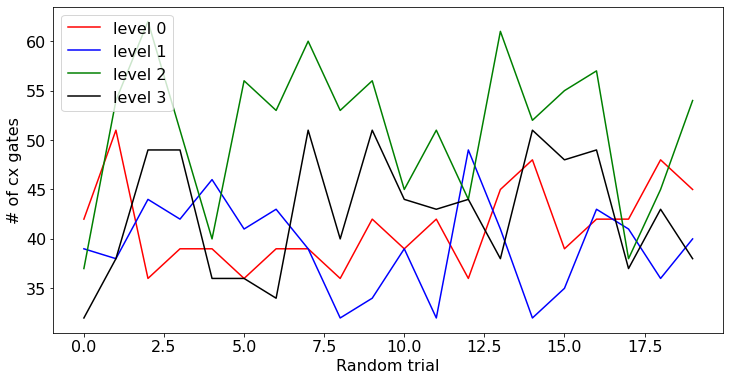

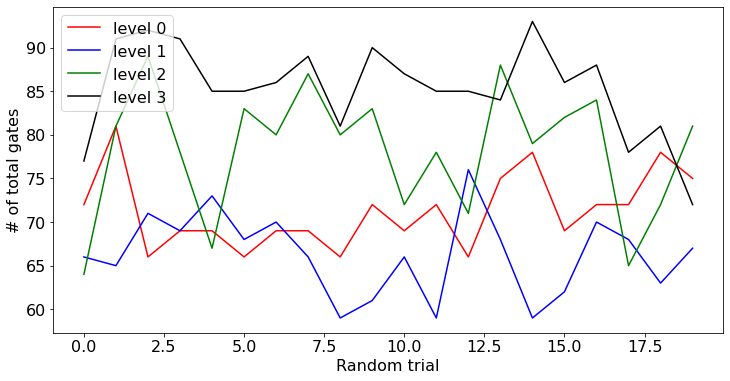

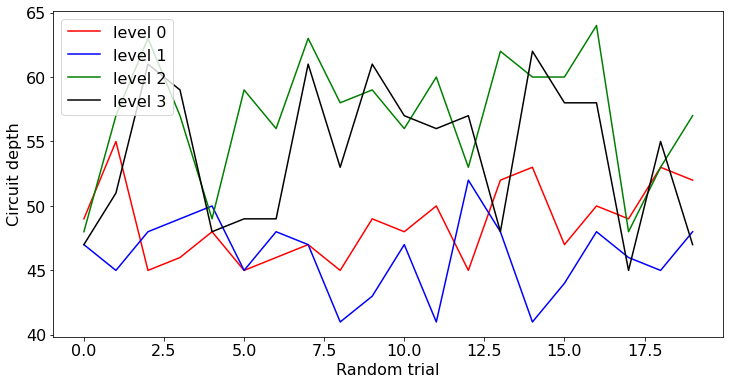

Opt0: Minimum # of cx gates = 36
Opt0: The best circuit is the circut 2 

Opt1: Minimum # of cx gates = 32
Opt1: The best circuit is the circut 8 

Opt2: Minimum # of cx gates = 37
Opt2: The best circuit is the circut 0 

Opt3: Minimum # of cx gates = 32
Opt3: The best circuit is the circut 0


In [41]:
import matplotlib.pyplot as plt

num_cx0 = [c.count_ops()['cx'] for c in tcircs0]
num_cx1 = [c.count_ops()['cx'] for c in tcircs1]
num_cx2 = [c.count_ops()['cx'] for c in tcircs2]
num_cx3 = [c.count_ops()['cx'] for c in tcircs3]

num_tot0 = [c.size() for c in tcircs0]
num_tot1 = [c.size() for c in tcircs1]
num_tot2 = [c.size() for c in tcircs2]
num_tot3 = [c.size() for c in tcircs3]

num_depth0 = [c.depth() for c in tcircs0]
num_depth1 = [c.depth() for c in tcircs1]
num_depth2 = [c.depth() for c in tcircs2]
num_depth3 = [c.depth() for c in tcircs3]

plt.rcParams.update({'font.size': 16})

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_cx0)),num_cx0,'r',label='level 0')
plt.plot(range(len(num_cx1)),num_cx1,'b',label='level 1')
plt.plot(range(len(num_cx2)),num_cx2,'g',label='level 2')
plt.plot(range(len(num_cx3)),num_cx3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of cx gates')
plt.show()

# Plot total number of gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_tot0)),num_tot0,'r',label='level 0')
plt.plot(range(len(num_tot1)),num_tot1,'b',label='level 1')
plt.plot(range(len(num_tot2)),num_tot2,'g',label='level 2')
plt.plot(range(len(num_tot3)),num_tot3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of total gates')
plt.show()

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_depth0)),num_depth0,'r',label='level 0')
plt.plot(range(len(num_depth1)),num_depth1,'b',label='level 1')
plt.plot(range(len(num_depth2)),num_depth2,'g',label='level 2')
plt.plot(range(len(num_depth3)),num_depth3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('Circuit depth')
plt.show()

print('Opt0: Minimum # of cx gates = %s' % min(num_cx0))
print('Opt0: The best circuit is the circut %s \n' % num_cx0.index(min(num_cx0)))

print('Opt1: Minimum # of cx gates = %s' % min(num_cx1))
print('Opt1: The best circuit is the circut %s \n' % num_cx1.index(min(num_cx1)))

print('Opt2: Minimum # of cx gates = %s' % min(num_cx2))
print('Opt2: The best circuit is the circut %s \n' % num_cx2.index(min(num_cx2)))

print('Opt3: Minimum # of cx gates = %s' % min(num_cx3))
print('Opt3: The best circuit is the circut %s' % num_cx3.index(min(num_cx3)))

## See Qiskit documentations for more detail: https://qiskit.org/documentation/